# IMPORTACIÓN LIBRERIAS


In [1]:
import numpy as np
import pandas as pd
from math import *
import math
import matplotlib.pyplot as plt
# from PIL import Image
import seaborn as sns
# import itertools
# import io 
# import plotly.offline as py
#py.init_notebook_mode(connect=True)
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

# CARGA DE ARCHIVOS

In [2]:
def load_dataset(file_path, file_type=None, separator=None, encoding='utf-8', **kwargs):
    """
    Loads a dataset in different formats, with support for custom separators, encoding, and more options.
    """
    # If the file type is not specified, infer from file extension
    if not file_type:
        file_type = file_path.split('.')[-1].lower()

    # Load according to the file type
    if file_type == 'csv':
        return pd.read_csv(file_path, sep=separator or ',', encoding=encoding, **kwargs)
    elif file_type in ['xls', 'xlsx']:
        return pd.read_excel(file_path, **kwargs)
    elif file_type == 'json':
        return pd.read_json(file_path, encoding=encoding, **kwargs)
    else:
        raise ValueError(f"File format '{file_type}' not supported. Use 'csv', 'excel', or 'json'.")

Se importan todos los archivos csv que se han creado para juntar la info y trabajar con ellos para que salga el documento final para el modelo.

In [7]:
abonados = load_dataset('../data/abonados_final_para_modelo.csv')
servicios_extra = load_dataset('../data/servicios_final.csv')
economia = load_dataset('../data/economia_final.csv')
accesos = load_dataset('../data/resumen_accesos_final.csv')

# PRIMERA PARTE: ABONADOS + SERVICIOS EXTRA

In [65]:
abonados.head()

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7
4,891,78.0,False,0,66.70,AVET,True,False,False,False,175.9


In [66]:
abonados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   IdPersona                         8185 non-null   int64  
 1   Edad                              8185 non-null   float64
 2   Sexo_Mujer                        8185 non-null   bool   
 3   Churn                             8185 non-null   int64  
 4   AntiguedadAños                    8185 non-null   float64
 5   TipoUltimoAbono                   8185 non-null   object 
 6   Irregularidad_ActivoIrregular     8185 non-null   bool   
 7   Irregularidad_ActivoRegular       8185 non-null   bool   
 8   Irregularidad_BajaFinalIrregular  8185 non-null   bool   
 9   Irregularidad_BajaFinalRegular    8185 non-null   bool   
 10  MesesDesdeUltimoAbono             8185 non-null   float64
dtypes: bool(5), float64(3), int64(2), object(1)
memory usage: 423.8+ KB


In [10]:
servicios_extra.head()

,IdPersona,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,...,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
0,20976,0.00,0.0,44.70,1.0,44.70,1,0,0,0,...,0,0,0,0,0,1,0,1,1,True
1,25409,0.00,0.0,26.90,1.0,26.90,1,0,0,0,...,0,0,0,0,0,1,0,1,1,True
2,29665,0.00,0.0,44.70,1.0,44.70,1,0,0,1,...,0,0,0,0,1,0,0,1,1,True
3,46715,438.75,2.0,673.50,3.0,1112.25,5,0,0,0,...,0,0,0,0,0,1,0,1,1,True
4,46901,0.00,0.0,236.85,1.0,236.85,1,0,0,0,...,0,0,0,0,1,0,0,1,1,True


In [11]:
servicios_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 33 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   IdPersona                                           41 non-null     int64  
 1   Importe_2024_servicios                              41 non-null     float64
 2   Cantidad_2024_servicios                             41 non-null     float64
 3   Importe_2025_servicios                              41 non-null     float64
 4   Cantidad_2025_servicios                             41 non-null     float64
 5   Importe_total_pagado_servicios                      41 non-null     float64
 6   Cantidad_total_pagado_servicios                     41 non-null     int64  
 7   Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT     41 non-null     int64  
 8   Concepto_ENTRENADOR PERSONAL 1 SESSIO               41 non-null     int64  
 9   C

#### TRATAMIENTO CORRECTO TIPADO DE COLUMNAS

In [18]:
# Utilizamos esta linea de codigo para poder ver todas las columnas del dataframe
pd.set_option('display.max_columns', None)

In [42]:
servicios_extra['Cantidad_2024_servicios'] = servicios_extra['Cantidad_2024_servicios'].astype(int)
servicios_extra['Cantidad_2025_servicios'] = servicios_extra['Cantidad_2025_servicios'].astype(int)
servicios_extra['Cantidad_total_pagado_servicios'] = servicios_extra['Cantidad_total_pagado_servicios'].astype(int)
servicios_extra['TipoServicio_ENTRENAMENTS PERSONALS'] = servicios_extra['TipoServicio_ENTRENAMENTS PERSONALS'].astype(int)
servicios_extra['TipoServicio_FISIOTERÀPIA'] = servicios_extra['TipoServicio_FISIOTERÀPIA'].astype(int)
servicios_extra['TipoServicio_NUTRICIÓ'] = servicios_extra['TipoServicio_NUTRICIÓ'].astype(int)


In [43]:
# Conceptos a bool
concepto_cols = [col for col in servicios_extra.columns if col.startswith('Concepto_')]
servicios_extra[concepto_cols] = servicios_extra[concepto_cols].astype(bool)

In [67]:
servicios_extra.sample(5)

,IdPersona,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
15,100924,68.20,1,0.0,0,68.20,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,0,0,1,1,1,True
29,110807,197.35,1,0.0,0,197.35,1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,1,1,True
9,95199,0.00,0,53.8,2,53.80,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1,0,0,1,1,True
0,20976,0.00,0,44.7,1,44.70,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,0,1,0,1,1,True
39,116880,0.00,0,30.0,1,30.00,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,0,0,1,1,1,True


#### UNIÓN DATAFRAMES POR ID DE PERSONA

In [ ]:

union_serivicios= pd.merge(abonados, servicios_extra, on='IdPersona', how='left')
union_serivicios

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,891,78.0,False,0,66.70,AVET,True,False,False,False,175.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,116944,11.0,True,1,1.10,FA00,False,False,True,False,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8181,116981,17.0,False,1,0.09,AM00,False,False,True,False,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8182,116987,23.0,False,1,0.08,JO00,False,False,True,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8183,116996,17.0,False,1,1.00,AM00,False,False,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
union_serivicios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   IdPersona                                           8185 non-null   int64  
 1   Edad                                                8185 non-null   float64
 2   Sexo_Mujer                                          8185 non-null   bool   
 3   Churn                                               8185 non-null   int64  
 4   AntiguedadAños                                      8185 non-null   float64
 5   TipoUltimoAbono                                     8185 non-null   object 
 6   Irregularidad_ActivoIrregular                       8185 non-null   bool   
 7   Irregularidad_ActivoRegular                         8185 non-null   bool   
 8   Irregularidad_BajaFinalIrregular                    8185 non-null   bool   
 9

#### TRATAMIENTO DATAFRAME UNIDO

In [47]:
df_merge= union_serivicios.copy()

In [48]:
df_merge['UsoServiciosExtra'] = df_merge['UsoServiciosExtra'].fillna(False)

In [51]:
df_merge[df_merge['UsoServiciosExtra']==False]

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,891,78.0,False,0,66.70,AVET,True,False,False,False,175.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,116944,11.0,True,1,1.10,FA00,False,False,True,False,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8181,116981,17.0,False,1,0.09,AM00,False,False,True,False,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8182,116987,23.0,False,1,0.08,JO00,False,False,True,False,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8183,116996,17.0,False,1,1.00,AM00,False,False,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [52]:
# Selecciona las columnas que comienzan por 'Concepto_'
concepto_cols = [col for col in df_merge.columns if col.startswith('Concepto_')]

# Reemplaza NaN por 0 y luego convierte a booleano
df_merge[concepto_cols] = df_merge[concepto_cols].fillna(0).astype(bool)


In [54]:
df_merge['UsoServiciosExtra'].value_counts()


UsoServiciosExtra
False    8148
True       37
Name: count, dtype: int64

In [55]:
df_merge.columns


Index(['IdPersona', 'Edad', 'Sexo_Mujer', 'Churn', 'AntiguedadAños',
       'TipoUltimoAbono', 'Irregularidad_ActivoIrregular',
       'Irregularidad_ActivoRegular', 'Irregularidad_BajaFinalIrregular',
       'Irregularidad_BajaFinalRegular', 'MesesDesdeUltimoAbono',
       'Importe_2024_servicios', 'Cantidad_2024_servicios',
       'Importe_2025_servicios', 'Cantidad_2025_servicios',
       'Importe_total_pagado_servicios', 'Cantidad_total_pagado_servicios',
       'Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT',
       'Concepto_ENTRENADOR PERSONAL 1 SESSIO',
       'Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT',
       'Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS)',
       'Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT',
       'Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT',
       'Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT',
       'Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT',
       'Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT',
       'Concepto_FISIO ABON

In [56]:
columnas_a_rellenar = ['Importe_2024_servicios', 'Cantidad_2024_servicios',
       'Importe_2025_servicios', 'Cantidad_2025_servicios',
       'Importe_total_pagado_servicios', 'Cantidad_total_pagado_servicios','TipoServicio_ENTRENAMENTS PERSONALS', 'TipoServicio_FISIOTERÀPIA',
       'TipoServicio_NUTRICIÓ', 'Total_conceptos_unicos',
       'Total_tipos_servicios_unicos']  # ejemplo
df_merge[columnas_a_rellenar] = df_merge[columnas_a_rellenar].fillna(0)

In [60]:
df_merge

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
4,891,78.0,False,0,66.70,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180,116944,11.0,True,1,1.10,FA00,False,False,True,False,2.2,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
8181,116981,17.0,False,1,0.09,AM00,False,False,True,False,0.8,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
8182,116987,23.0,False,1,0.08,JO00,False,False,True,False,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
8183,116996,17.0,False,1,1.00,AM00,False,False,True,False,2.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False


#### EDA

In [61]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = df_merge.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(df_merge)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")


📌 Variables with missing values:
✅ No missing values in the dataset.


In [64]:
print("\n🔍 Duplicate Rows:")

# Count how many rows are duplicates
duplicated_rows = df_merge.duplicated().sum()
if duplicated_rows > 0:
    print("🔴 Duplicate Rows:")
    display(df_merge[df_merge.duplicated()])  # Show duplicate rows
else:
    print('No duplicate rows')

# Check for duplicate columns
print("\n🔍 Duplicate Columns:")

# Transpose the df_merge to check for duplicate columns
duplicated_columns = df_merge.T.duplicated().sum()
if duplicated_columns > 0:
    display(df_merge[df_merge.duplicated()])  # Show duplicate columns
else:
    print('No duplicate columns')


🔍 Duplicate Rows:
No duplicate rows

🔍 Duplicate Columns:


,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra


# SEGUNDA PARTE UNIÓN: ABONADOS Y SERVICIOS + ECONOMIA

In [69]:
df_merge.head()

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False
4,891,78.0,False,0,66.70,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False


In [70]:
economia.head()

,IdPersona,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,PagoSinSaltos
0,100013,1,1,59.95,59.9500,0.0,59.95,0.0,0.0,0,0.083333,0.000000,0,0,0.000000,Recibo,AA00,AA00,0.0,59.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,AA00,0,0.000000,0.000000,0,0,1
1,100037,12,2,319.65,26.6375,0.0,319.65,0.0,0.0,1,1.000000,0.885969,0,11,11.005256,Recibo,AR00,QM01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,291.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.75,0.0,0.0,0.0,AR00,1,-0.069630,0.000000,0,0,1
2,100043,12,1,559.20,46.6000,0.0,513.50,45.7,0.0,0,1.000000,0.025751,0,11,11.005256,Recibo,JO00,JO00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,559.2,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,JO00,0,0.003734,0.003734,0,0,1
3,100060,12,1,712.50,59.3750,0.0,712.50,0.0,0.0,0,1.000000,0.038737,0,11,11.005256,Recibo,AA00,AA00,0.0,712.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,AA00,0,0.007156,0.007156,0,0,1
4,100062,12,1,458.70,38.2250,0.0,458.70,0.0,0.0,0,1.000000,0.039241,0,11,11.005256,Recibo,AG00,AG00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,458.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,AG00,0,0.004667,0.004667,0,0,1


In [76]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8185 entries, 0 to 8184
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   IdPersona                                           8185 non-null   int64  
 1   Edad                                                8185 non-null   float64
 2   Sexo_Mujer                                          8185 non-null   bool   
 3   Churn                                               8185 non-null   int64  
 4   AntiguedadAños                                      8185 non-null   float64
 5   TipoUltimoAbono                                     8185 non-null   object 
 6   Irregularidad_ActivoIrregular                       8185 non-null   bool   
 7   Irregularidad_ActivoRegular                         8185 non-null   bool   
 8   Irregularidad_BajaFinalIrregular                    8185 non-null   bool   
 9

In [77]:
economia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7174 entries, 0 to 7173
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdPersona                7174 non-null   int64  
 1   NumRenovaciones          7174 non-null   int64  
 2   NumTiposAbono            7174 non-null   int64  
 3   TotalPagado              7174 non-null   float64
 4   MediaPagada              7174 non-null   float64
 5   TotalMetálico            7174 non-null   float64
 6   TotalRecibo              7174 non-null   float64
 7   TotalTarjeta             7174 non-null   float64
 8   TotalTransferencia       7174 non-null   float64
 9   CambioAbono              7174 non-null   int64  
 10  RatioMesesPagados        7174 non-null   float64
 11  CefVarImporte            7174 non-null   float64
 12  MesesDesdeUltimoPago     7174 non-null   int64  
 13  MesesDesdePrimerPago     7174 non-null   int64  
 14  DuracionRenovacionMeses 

In [79]:
economia['TienePagos'] = True

#### UNIÓN DATAFRAMES POR ID DE PERSONA

In [80]:
union_economia= pd.merge(df_merge, economia, on='IdPersona', how='left')
union_economia

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,PagoSinSaltos,TienePagos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,0.0,True
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,0.0,True
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,0.0,True
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,

#### TRATAMIENTO DATAFRAME UNIDO

In [139]:
union_economia_copy=union_economia.copy()
union_economia_copy

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,PagoSinSaltos,TienePagos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,0.0,True
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,0.0,True
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,0.0,True
3,849,85.0,False,0,67.12,CL04,False,True,False,False,816.7,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,

In [140]:
union_economia_copy['TienePagos'] = union_economia_copy['TienePagos'].fillna(False)


In [141]:
union_economia_copy['TienePagos'].value_counts()

TienePagos
True     7139
False    1046
Name: count, dtype: int64

Como el numero de abonados sin dato economico es 1046 (un 12% mas o menos del total), se decide no precindir de esos abonados y se aplica un tratamiento de valores nulos.

-PRE


📌 Variables with missing values:


,Total Missing,Percentage Missing
NumRenovaciones,1046,12.779475
NumTiposAbono,1046,12.779475
TotalPagado,1046,12.779475
MediaPagada,1046,12.779475
TotalMetálico,1046,12.779475
...,...,...
TendenciaPago,1046,12.779475
TendenciaPagoMismoAbono,1046,12.779475
NumImpagosReales,1046,12.779475
NumReactivaciones,1046,12.779475


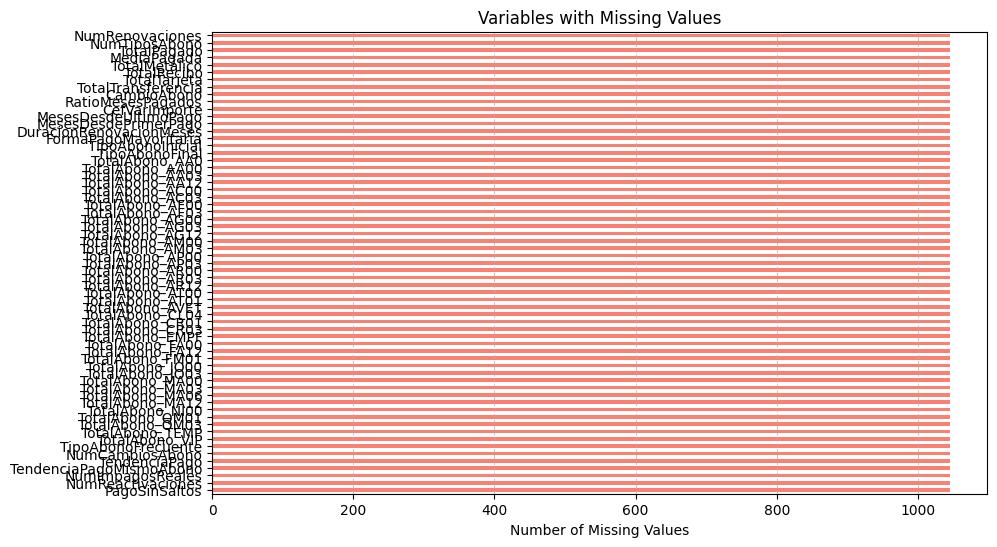

In [143]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = union_economia_copy.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(union_economia_copy)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")


Tratamiento columnas categoricas


In [147]:
categorical_cols = [
    'FormaPagoMayoritaria',
    'TipoAbonoInicial',
    'TipoAbonoFinal',
    'TipoAbonoFrecuente'
]

union_economia_copy[categorical_cols] = union_economia_copy[categorical_cols].fillna('Indefinido')


Tratamientos de los totales de pagos para abono 

In [ ]:
abono_cols = [col for col in union_economia_copy.columns if col.startswith('TotalAbono_')]
union_economia_copy[abono_cols] = union_economia_copy[abono_cols].fillna(0)

Tratamiento de la columna PagoSinSaltos

In [150]:
union_economia_copy['PagoSinSaltos'].unique()

array([ 0.,  1., nan])

In [152]:
# Asigna -1 a los que no tienen datos económicos
sin_datos_economicos = union_economia_copy['TotalPagado'].isna()
union_economia_copy.loc[sin_datos_economicos, 'PagoSinSaltos'] = -1

In [153]:
union_economia_copy['PagoSinSaltos'].unique()

array([ 0.,  1., -1.])

In [154]:
union_economia_copy['PagoSinSaltos'] = union_economia_copy['PagoSinSaltos'].map({
    -1: 'no_aplica',
    0: 'irregular',
    1: 'regular'
})

In [155]:
union_economia_copy = pd.get_dummies(union_economia_copy, columns=['PagoSinSaltos'], prefix='PagoSinSaltos')

Tratamiento de columnas numericas 

In [ ]:
cols_a_0 = [
    'NumRenovaciones',
    'NumTiposAbono',
    'TotalPagado',
    'MediaPagada',
    'TotalMetálico',
    'TotalRecibo',
    'TotalTarjeta',
    'TotalTransferencia',
    'CambioAbono',
    'RatioMesesPagados',
    'CefVarImporte',
    'MesesDesdeUltimoPago'   ,
    'MesesDesdePrimerPago',
    'DuracionRenovacionMeses',
    'NumCambiosAbono',
    'TendenciaPago',
    'TendenciaPagoMismoAbono',
    'NumImpagosReales',
    'NumReactivaciones',
]

union_economia_copy[cols_a_0] = union_economia_copy[cols_a_0].fillna(0)

-POST

In [162]:
# 4. Variables with missing values
    # Detect columns with missing values and show the percentage
print("\n📌 Variables with missing values:")

# Count missing values by column
missing = union_economia_copy.isnull().sum()

# Filter only columns with missing values
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing percentage
missing_percentage = (missing / len(union_economia_copy)) * 100

# Create a DataFrame to show the count and percentage of missing values
missing_df = pd.DataFrame({'Total Missing': missing, 'Percentage Missing': missing_percentage})

# If missing values exist, display a bar chart of missing values distribution
if not missing.empty:
    display(missing_df)
    plt.figure(figsize=(10, 6))
    missing.plot(kind='barh', color='salmon')  # Horizontal bar chart
    plt.title("Variables with Missing Values")
    plt.xlabel("Number of Missing Values")
    plt.gca().invert_yaxis()  # Invert y-axis to show variables with most missing values first
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add grid to the chart
    plt.show()
else:
    print("✅ No missing values in the dataset.")


📌 Variables with missing values:
✅ No missing values in the dataset.


In [ ]:
union_economia_copy

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False
3,849,

# TERCERA PARTE: ABONADOS, SERVICIOS EXTRA Y ECONOMIA + ACCESOS TOTALES

In [166]:
union_economia_copy.head()

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False
1,452,85.0,False,0,69.00,AVET,False,True,False,False,839.5,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False
2,642,77.0,False,0,67.54,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False
3,849,85.0,False,0

In [167]:
accesos.head()

,IdPersona,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasCerrado,PropVisitasCerrado,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,PrimeraVisita,UltimaVisita,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano
0,334,3,3,1.500000,2.432432,1,0.000000,50.422222,8.675597,50.422222,0.000000,0.333333,3,3,3,1.000000,383,9,1.500000,2.0,2,2,1,5.0,1,11.144444,0.452224,0.530612,0.000000,0.000000,0.000000,1.000000,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.0,0,0.0,2024-09-10,2024-09-17,7,3,3,False,False,False,True,False,False,False,False,True,False,False
1,2476,4,4,0.444444,1.395349,1,0.222222,81.408333,20.670257,81.408333,0.000000,1.000000,2,4,4,1.000000,45,298,4.642796,14.0,4,9,4,25.0,1,9.487500,0.967268,1.102041,0.000000,0.000000,1.000000,0.000000,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.0,0,0.0,2025-06-26,2025-08-21,56,4,4,False,True,False,False,False,False,False,False,False,False,True
2,2926,4,4,0.417910,1.333333,1,0.222222,40.066667,56.319974,40.066667,0.000000,0.250000,1,4,4,1.000000,292,47,14.514361,6.0,4,9,4,40.0,1,15.662500,2.937931,0.530612,0.000000,0.000000,0.000000,0.750000,0.250000,0,0.000000,0,0.000000,0,0.0,0,0.000000,0,0.0,0,0.0,2024-10-18,2024-12-17,60,4,4,False,True,False,False,False,False,False,False,True,False,False
3,3461,36,35,0.690411,2.783505,2,11.777778,95.457407,29.569428,117.154167,0.227293,0.916667,2,4,5,0.111111,34,7,23.910650,1.0,15,52,4,116.0,6,9.173611,0.696900,4.693878,0.166667,0.027778,0.083333,0.527778,0.361111,1,0.027778,6,0.166667,0,0.0,0,0.000000,0,0.0,0,0.0,2024-09-08,2025-09-01,358,18,4,False,False,True,False,False,False,False,False,True,False,False
4,4016,61,60,1.252199,5.027473,2,18.617284,83.150820,13.631576,88.990741,0.070233,0.983607,11,18,39,0.295082,40,25,14.171999,1.0,26,48,6,103.0,3,12.221585,2.043097,22.775510,0.081967,0.327869,0.295082,0.032787,0.344262,1,0.016393,5,0.081967,0,0.0,2,0.032787,0,0.0,0,0.0,2024-09-26,2025-08-26,334,2,18,False,False,True,False,False,False,False,True,False,False,False


In [168]:
accesos['TieneAccesos'] = True

#### UNIÓN DATAFRAMES POR ID DE PERSONA

In [169]:
union_accesos= pd.merge(union_economia_copy, accesos, on='IdPersona', how='left')
union_accesos

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasCerrado,PropVisitasCerrado,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,PrimeraVisita,UltimaVisita,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano,TieneAccesos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False,3.0,3.0,1.500000,2.432432,1.0,0.00,50.422222,8.675597,50.422222,0.0,0.33

In [171]:
union_accesos['TieneAccesos'] = union_accesos['TieneAccesos'].fillna(False)

In [176]:
union_accesos['Churn'].value_counts()

Churn
0    4941
1    3244
Name: count, dtype: int64

In [178]:
union_accesos

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasCerrado,PropVisitasCerrado,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,PrimeraVisita,UltimaVisita,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano,TieneAccesos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False,3.0,3.0,1.500000,2.432432,1.0,0.00,50.422222,8.675597,50.422222,0.0,0.33

In [181]:
# Identificar columnas tipo flag (día favorito y estación favorita)
columnas_flags = [col for col in union_accesos.columns if col.startswith('DiaFav_') or col.startswith('EstFav_')]

# Rellenar NaN con False
union_accesos[columnas_flags] = union_accesos[columnas_flags].fillna(False)

In [182]:
union_accesos['DiaFav_domingo'].unique()

array([False,  True])

In [184]:
union_accesos

,IdPersona,Edad,Sexo_Mujer,Churn,AntiguedadAños,TipoUltimoAbono,Irregularidad_ActivoIrregular,Irregularidad_ActivoRegular,Irregularidad_BajaFinalIrregular,Irregularidad_BajaFinalRegular,MesesDesdeUltimoAbono,Importe_2024_servicios,Cantidad_2024_servicios,Importe_2025_servicios,Cantidad_2025_servicios,Importe_total_pagado_servicios,Cantidad_total_pagado_servicios,Concepto_ENTRENADOR PERSONAL 1 /2 SESSIO ABONAT,Concepto_ENTRENADOR PERSONAL 1 SESSIO,Concepto_ENTRENADOR PERSONAL 1 SESSIÓ ABONAT,Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS),Concepto_ENTRENADOR PERSONAL 10 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 10 SESSIONS ABONAT,Concepto_ENTRENADOR PERSONAL 5 (30 MINUTS) ABONAT,Concepto_ENTRENADOR PERSONAL 5 SESSIONS ABONAT,Concepto_FISIO ABONAMENT 10 SESSIONS 60' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 30' ABONAT,Concepto_FISIO ABONAMENT 5 SESSIONS 60',Concepto_FISIO PACK BENVINGUDA,Concepto_FISIOTERÀPIA 60' ABONAT,Concepto_FISIOTERÀPIA 30' ABONAT,Concepto_NUTRI ANTROPOMETRIA,Concepto_NUTRI ANTROPOMETRIA ABONAT,Concepto_NUTRI PACK 3 SEGUIMENTS ABONAT,Concepto_NUTRI VISITA DE SEGUIMENT ABONAT,Concepto_PACK 3 SEGUIMENTS ABONAT,Concepto_PACK NUTRICIÓ (2 VISITES) ABONAT,TipoServicio_ENTRENAMENTS PERSONALS,TipoServicio_FISIOTERÀPIA,TipoServicio_NUTRICIÓ,Total_conceptos_unicos,Total_tipos_servicios_unicos,UsoServiciosExtra,NumRenovaciones,NumTiposAbono,TotalPagado,MediaPagada,TotalMetálico,TotalRecibo,TotalTarjeta,TotalTransferencia,CambioAbono,RatioMesesPagados,CefVarImporte,MesesDesdeUltimoPago,MesesDesdePrimerPago,DuracionRenovacionMeses,FormaPagoMayoritaria,TipoAbonoInicial,TipoAbonoFinal,TotalAbono_AA0,TotalAbono_AA00,TotalAbono_AA03,TotalAbono_AA12,TotalAbono_AC00,TotalAbono_AC03,TotalAbono_AF00,TotalAbono_AF03,TotalAbono_AG00,TotalAbono_AG03,TotalAbono_AG12,TotalAbono_AM00,TotalAbono_AM03,TotalAbono_AP00,TotalAbono_AP03,TotalAbono_AR00,TotalAbono_AR03,TotalAbono_AR12,TotalAbono_AT00,TotalAbono_AT01,TotalAbono_AVET,TotalAbono_CL04,TotalAbono_CR01,TotalAbono_CR03,TotalAbono_EMPF,TotalAbono_FA00,TotalAbono_FA12,TotalAbono_FM01,TotalAbono_JO00,TotalAbono_JO03,TotalAbono_MA00,TotalAbono_MA03,TotalAbono_MA06,TotalAbono_MA12,TotalAbono_NI00,TotalAbono_QM01,TotalAbono_QM03,TotalAbono_TEMP,TotalAbono_VIP,TipoAbonoFrecuente,NumCambiosAbono,TendenciaPago,TendenciaPagoMismoAbono,NumImpagosReales,NumReactivaciones,TienePagos,PagoSinSaltos_irregular,PagoSinSaltos_no_aplica,PagoSinSaltos_regular,TotalVisitas,DiasActivo,VisitasPorSemana,VisitasPorMes,MaxVisitasDia,VarVisitasMes,DuracionMediaTotal,DuracionStdTotal,DuracionMediaUlt90,DeltaDuracionUlt90VsTotal,PropVisitasLargas,VisitasUlt30,VisitasUlt90,VisitasUlt180,PropUlt90,DiasDesdeUltima,DiasHastaPrimera,StdDiasEntreVisitas,FrecuenciaModal,SemanasConVisita,SemanasTotales,SemanasConUnaVisita,MaxRachaSinVisita,MaxRachaConVisita,HoraMediaAcceso,HoraStdAcceso,VarDiasSemana,PropFindesemana,PropPrimavera,PropVerano,PropOtono,PropInvierno,VisitasFestivos,PropVisitasFestivos,VisitasFindesemana,PropVisitasFindesemana,VisitasCerrado,PropVisitasCerrado,VisitasRed9a14,PropVisitasRed9a14,VisitasRed7a20,PropVisitasRed7a20,VisitasRed7a15,PropVisitasRed7a15,PrimeraVisita,UltimaVisita,TiempoActivoDias,VisitasPrimerTrimestre,VisitasUltimoTrimestre,DiaFav_domingo,DiaFav_jueves,DiaFav_lunes,DiaFav_martes,DiaFav_miércoles,DiaFav_sábado,DiaFav_viernes,EstFav_invierno,EstFav_otono,EstFav_primavera,EstFav_verano,TieneAccesos
0,334,82.0,False,0,69.81,AVET,True,False,False,False,175.9,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,False,2.0,1.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.166667,0.0,1.0,7.0,5.946124,Metálico,AVET,AVET,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AVET,0.0,0.0,0.0,1.0,0.0,True,True,False,False,3.0,3.0,1.500000,2.432432,1.0,0.00,50.422222,8.675597,50.422222,0.0,0.33

In [192]:
union_accesos['MaxVisitasDia'].unique()

array([ 1., nan,  2.,  4.,  3.,  5.])

In [193]:
nulos = union_accesos.isnull().sum()
nulos[nulos > 0].sort_values(ascending=False)

TotalVisitas                 1457
DiasActivo                   1457
VisitasPorSemana             1457
VisitasPorMes                1457
MaxVisitasDia                1457
VarVisitasMes                1457
DuracionMediaTotal           1457
DuracionStdTotal             1457
DuracionMediaUlt90           1457
DeltaDuracionUlt90VsTotal    1457
PropVisitasLargas            1457
VisitasUlt30                 1457
VisitasUlt90                 1457
VisitasUlt180                1457
PropUlt90                    1457
DiasDesdeUltima              1457
DiasHastaPrimera             1457
StdDiasEntreVisitas          1457
FrecuenciaModal              1457
SemanasConVisita             1457
SemanasTotales               1457
SemanasConUnaVisita          1457
MaxRachaSinVisita            1457
MaxRachaConVisita            1457
HoraMediaAcceso              1457
HoraStdAcceso                1457
VarDiasSemana                1457
PropFindesemana              1457
PropPrimavera                1457
PropVerano    